In [87]:
import os
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import yaml
import itertools
from scipy.interpolate import UnivariateSpline

In [88]:
project = 'Greenland'
output_dir = '/Users/quinnmackay/Desktop/table_out'
s_val = 1

# get all link combos
with open(f'/Users/quinnmackay/Documents/GitHub/BICC/Antarctic Chronology Accuracy Project/{project}/parameters.yml') as f:
    data = yaml.safe_load(f)
list_sites = data["list_sites"]
pairs = [f"{a}-{b}" for a, b in itertools.combinations(list_sites, 2)]

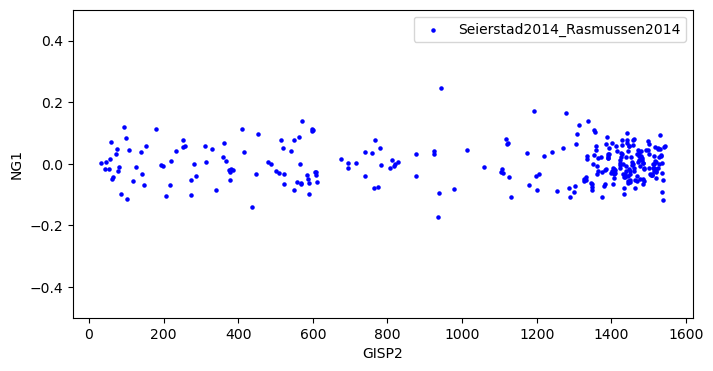

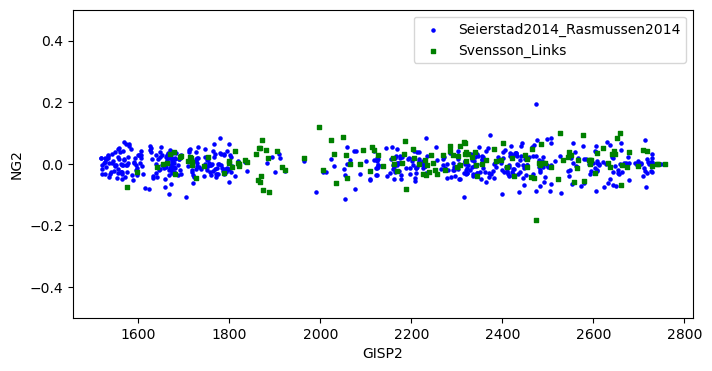

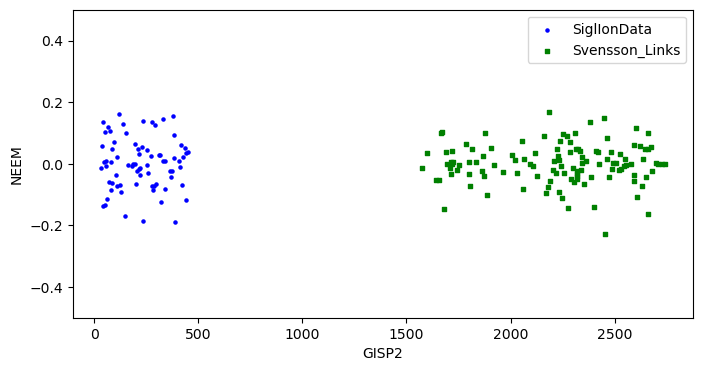

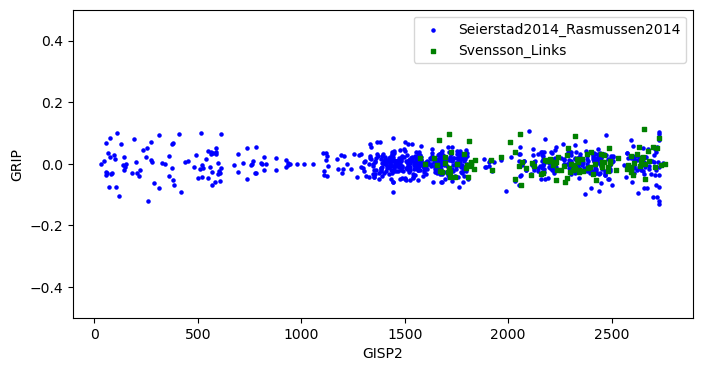

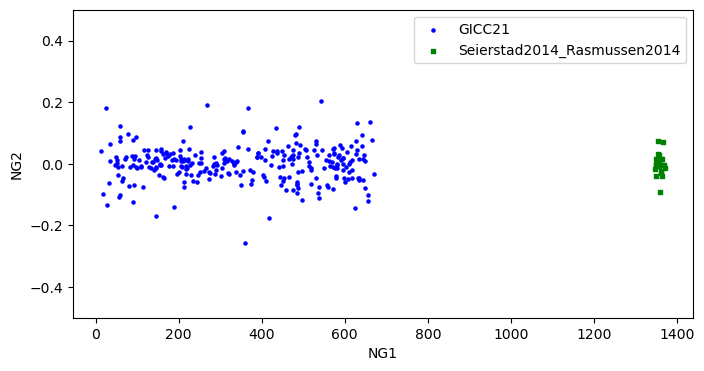

Outliers in NG1-NEEM from reference NEEM-GICC05:
[361.031]
[402.613]
Outliers in NG1-NEEM from reference GICC21:
[360.98]
[401.389]


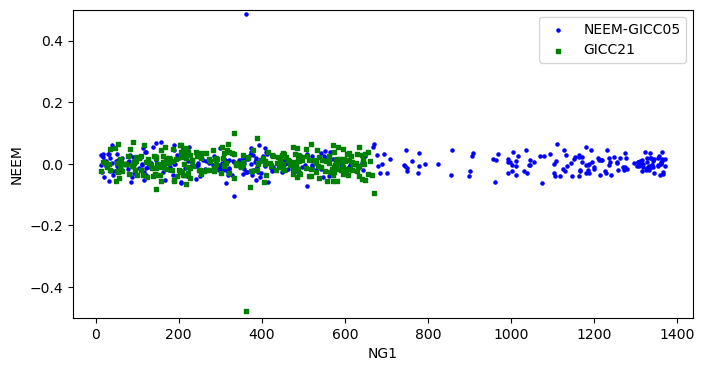

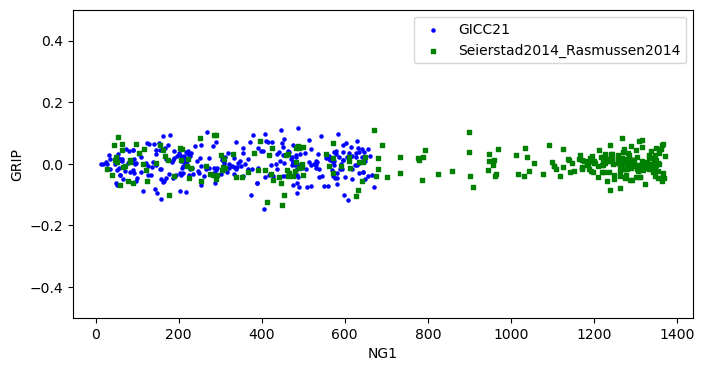

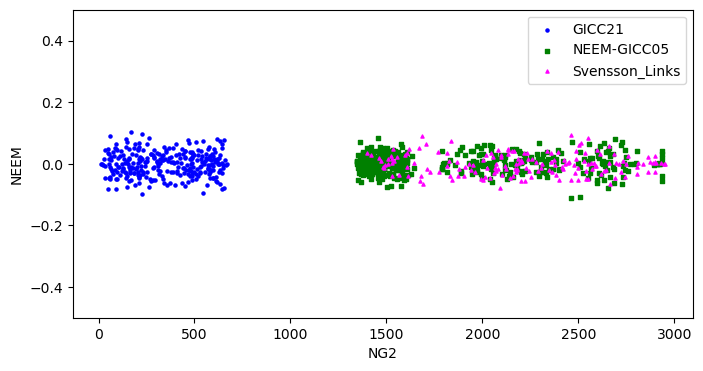

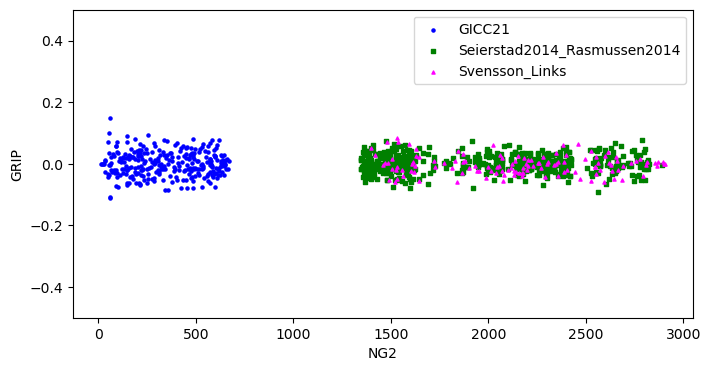

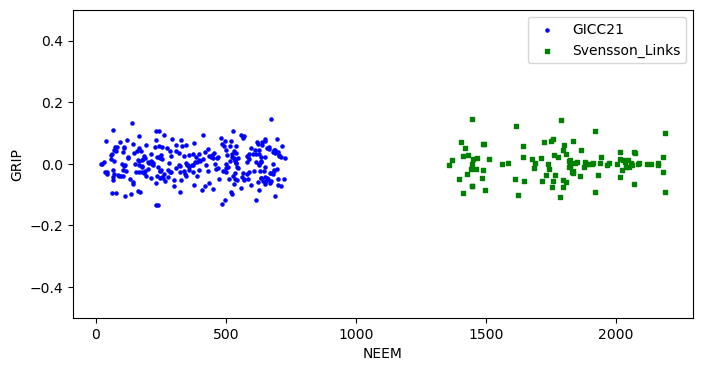

In [89]:
colors = ['blue', 'green', 'magenta', 'cyan', 'orange', 'yellow']
markers = ['o', 's', '^', 'D', 'v', 'p']

for pair in pairs:
    core1 = pair.split('-')[0]
    core2 = pair.split('-')[1]
    txt_files = glob.glob(f'/Users/quinnmackay/Documents/GitHub/BICC/Antarctic Chronology Accuracy Project/{project}/{pair}/*.txt')
    all_links = pd.DataFrame()
    for file in txt_files:
        df = pd.read_csv(file, sep='\t', comment='#')
        all_links = pd.concat([all_links, df], ignore_index=True)
    
    all_links.sort_values(by=['depth1'], inplace=True)

    x = all_links['depth1'] #x and y for spline
    y = all_links['depth2']
    
    spline = UnivariateSpline(x, y, s=s_val)

    x_new = np.linspace(x.min(), x.max(), 800) #new x values for spline, this is spline only
    y_new = spline(x_new)

    y_spline_subtract = spline(x)

    plt.figure(figsize=(8, 4))

    unique_refs = all_links['reference'].unique() #find each reference
    for i, ref in enumerate(unique_refs): #plot each reference separately
        subset = all_links[all_links['reference'] == ref]
        plt.scatter(subset['depth1'], subset['depth2'] - spline(subset['depth1']),
                    label=ref,
                    color=colors[i % len(colors)],
                    marker=markers[i % len(markers)],
                    s=5)
        data_check = pd.DataFrame({})
        data_check['depth1'] = subset['depth1']
        data_check['depth2_minus_spline'] = subset['depth2'] - spline(subset['depth1'])
        data_check['depth2'] = subset['depth2']

        out = data_check[data_check['depth2_minus_spline'].abs() > 0.4]
        if not out.empty:
            print(f'Outliers in {pair} from reference {ref}:')
            print(out['depth1'].values)
            print(out['depth2'].values)
    #plt.plot(x_new, y_new, '-', label='Spline')
    plt.xlabel(core1)
    plt.ylabel(core2)
    plt.ylim(-0.5, 0.5)
    plt.legend()
    plt.show()


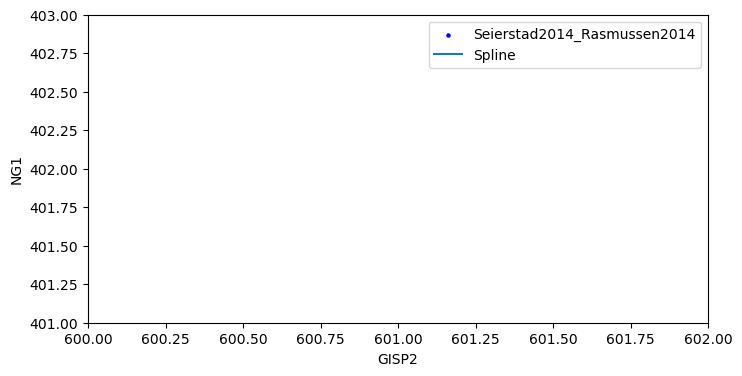

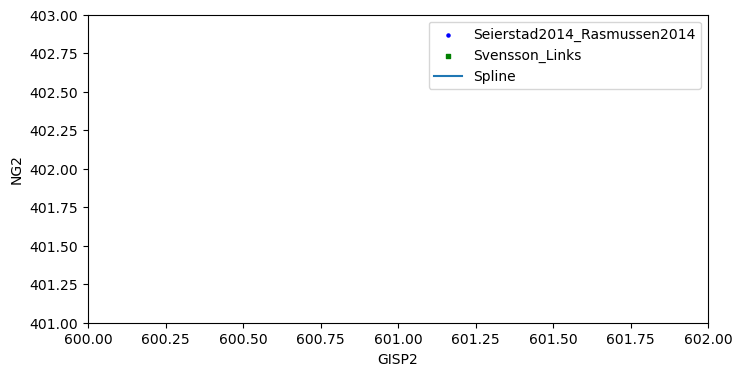

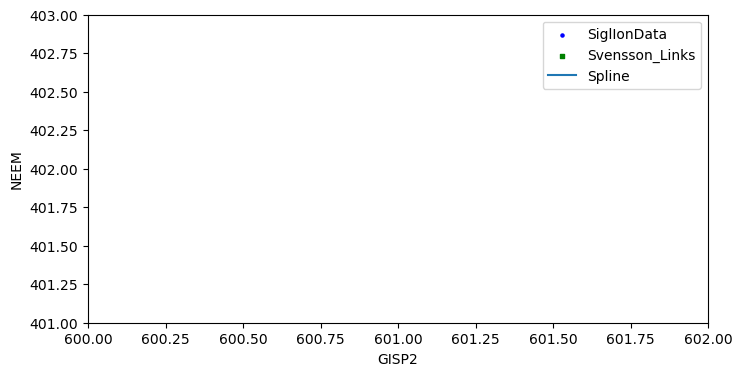

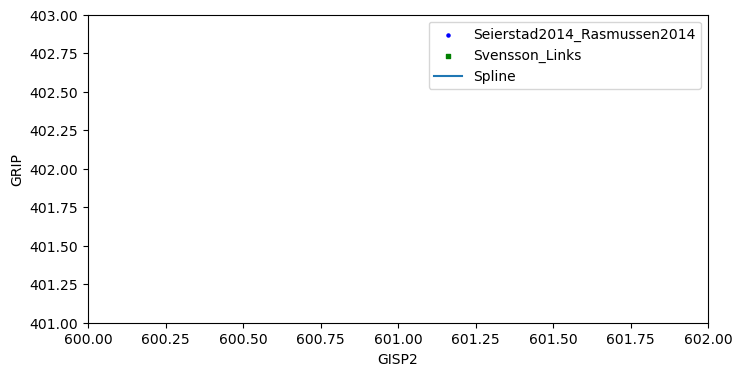

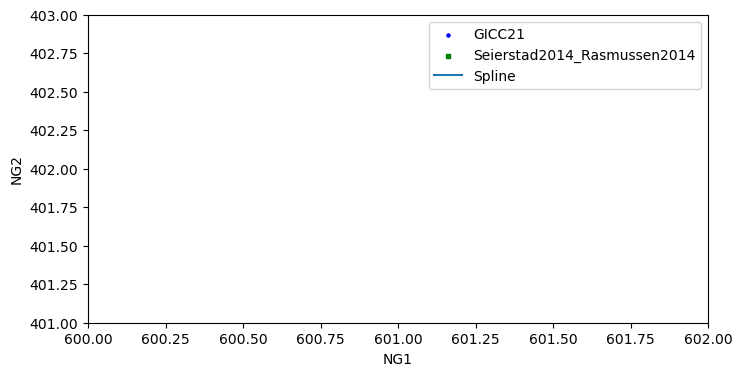

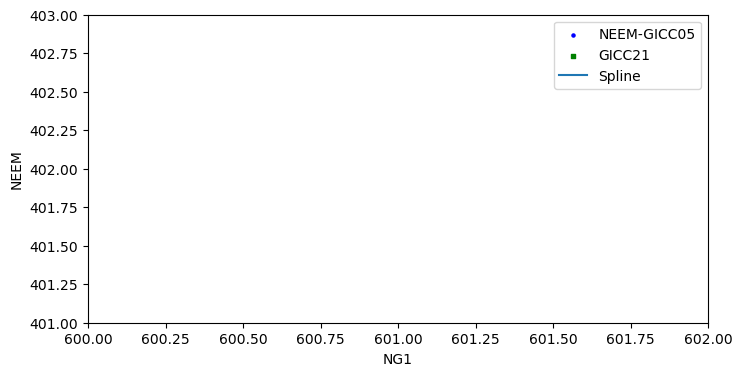

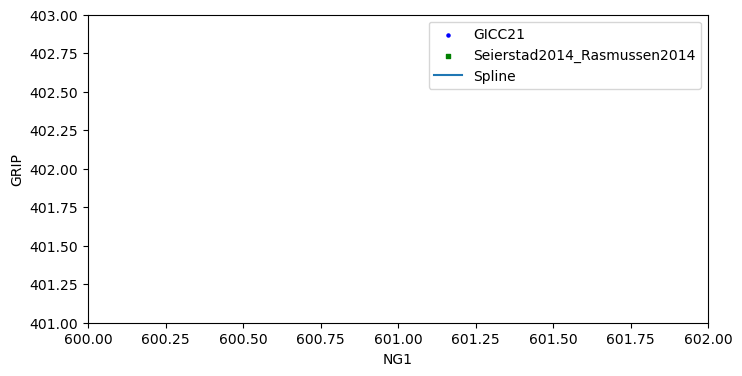

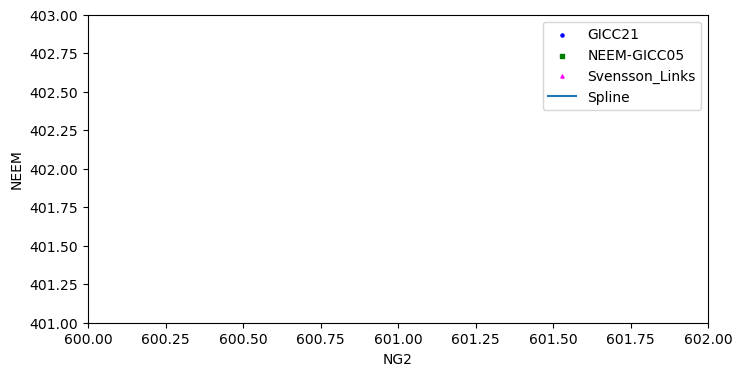

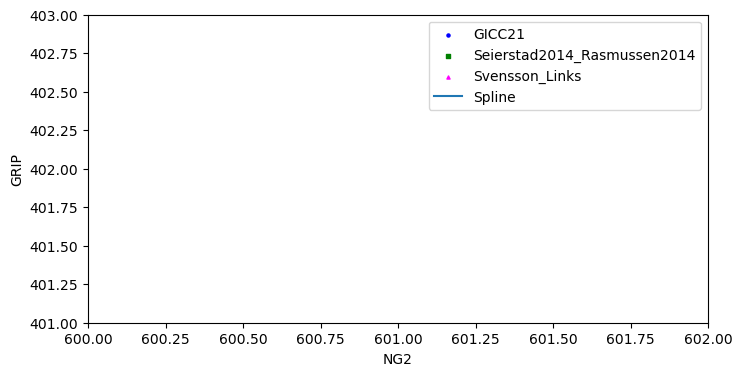

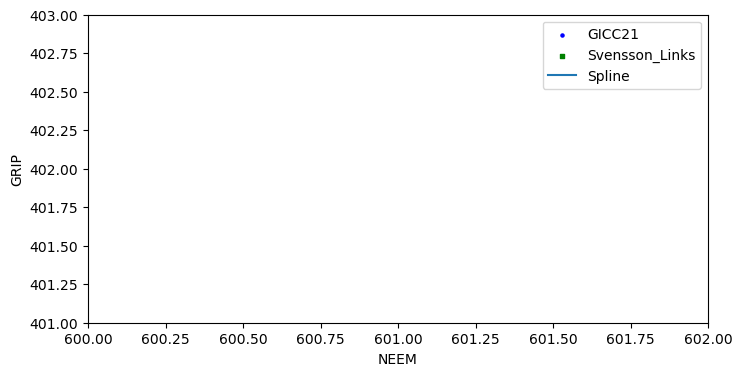

In [92]:
colors = ['blue', 'green', 'magenta', 'cyan', 'orange', 'yellow']
markers = ['o', 's', '^', 'D', 'v', 'p']

for pair in pairs:
    core1 = pair.split('-')[0]
    core2 = pair.split('-')[1]
    txt_files = glob.glob(f'/Users/quinnmackay/Documents/GitHub/BICC/Antarctic Chronology Accuracy Project/{project}/{pair}/*.txt')
    all_links = pd.DataFrame()
    for file in txt_files:
        df = pd.read_csv(file, sep='\t', comment='#')
        all_links = pd.concat([all_links, df], ignore_index=True)
    
    all_links.sort_values(by=['depth1'], inplace=True)

    x = all_links['depth1'] #x and y for spline
    y = all_links['depth2']
    
    spline = UnivariateSpline(x, y, s=s_val)

    x_new = np.linspace(x.min(), x.max(), 800) #new x values for spline, this is spline only
    y_new = spline(x_new)

    y_spline_subtract = spline(x)

    plt.figure(figsize=(8, 4))

    unique_refs = all_links['reference'].unique() #find each reference
    for i, ref in enumerate(unique_refs): #plot each reference separately
        subset = all_links[all_links['reference'] == ref]
        plt.scatter(subset['depth1'], subset['depth2'],
                    label=ref,
                    color=colors[i % len(colors)],
                    marker=markers[i % len(markers)],
                    s=5)
        data_check = pd.DataFrame({})
        data_check['depth1'] = subset['depth1']
        data_check['depth2_minus_spline'] = subset['depth2'] - spline(subset['depth1'])
        data_check['depth2'] = subset['depth2']

    
    plt.plot(x_new, y_new, '-', label='Spline')
    plt.xlabel(core1)
    plt.ylabel(core2)
    plt.ylim(401, 403)
    plt.xlim(600,602)
    plt.legend()
    plt.show()
